In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scpy

# Hiyerarşik Olmayan K-Means Algoritması 

#### K-means, kümeleme (clustering) adı verilen bir gözetimsiz öğrenme tekniğidir. K-means, veri setindeki benzer örnekleri gruplamak için kullanılır ve her bir grup, birbirinden farklı kümeleri temsil eder. Bu algoritma, her bir kümeyi belirli bir özellik veya özellikler aracılığıyla birbirinden ayırarak veri setini kümelere böler.

#### K-means algoritması genellikle aşağıdaki adımları takip eder:

#### Küme Merkezlerinin Başlangıç Değerlerinin Seçilmesi: İlk adımda, veri setindeki örnekler arasından rastgele seçilen k sayıda başlangıç merkezi belirlenir. Bu k merkez, k-means algoritmasının kümeleme işlemine başlamak için kullanılacak ilk kümeleri oluşturur.
#### Örneklerin Kümelerle İlişkilendirilmesi: Her bir örnek, ona en yakın olan küme merkezine atanır. Bu mesafe genellikle Öklid mesafesi kullanılarak hesaplanır. Her örnek, en yakın küme merkezine atanır ve bu şekilde kümelere ilişkilendirilir.
#### Küme Merkezlerinin Güncellenmesi: Her örneğin bir kümeye atanmasından sonra, küme merkezleri bu kümelerdeki örneklerin ortalamaları olarak güncellenir. Yani, her kümenin merkezi, o kümedeki tüm örneklerin ortalaması alınarak yeniden hesaplanır.
#### Yeniden Atama ve Merkez Güncelleme Adımlarının Tekrarlanması: 2. ve 3. adımlar, küme merkezlerinin sabitlenene ve kümeleme istenilen bir kritere ulaşılıncaya kadar (örneğin, belirli bir iterasyon sayısı veya merkezlerin değişim miktarının belirli bir eşiği) tekrarlanır.
#### Optimal Kümeleme Elde Edilene Kadar Tekrarlama: Yeniden atama ve merkez güncelleme adımları, kümeleme sonucunun istenen bir kriteri karşılayacak şekilde yakınsayana kadar tekrarlanır. Bu, önceden belirlenen bir hedef fonksiyonun minimumunu veya maksimumunu elde etmek için yapılır. Örneğin, küme içi varyansın minimumu gibi.

In [2]:
from sklearn.cluster import KMeans

In [6]:
usaarrest = pd.read_csv('./USArrests.csv')
df = usaarrest.copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Yukarıda da görüldüğü üzere kategorik değişkenimizi düzeltelim ve onu index haline getirelim

In [7]:
df.index = df.iloc[:,0]

In [8]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [9]:
df = df.iloc[:,1:5]

In [10]:
df

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [16]:
df = df.rename_axis(None)

In [17]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [20]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


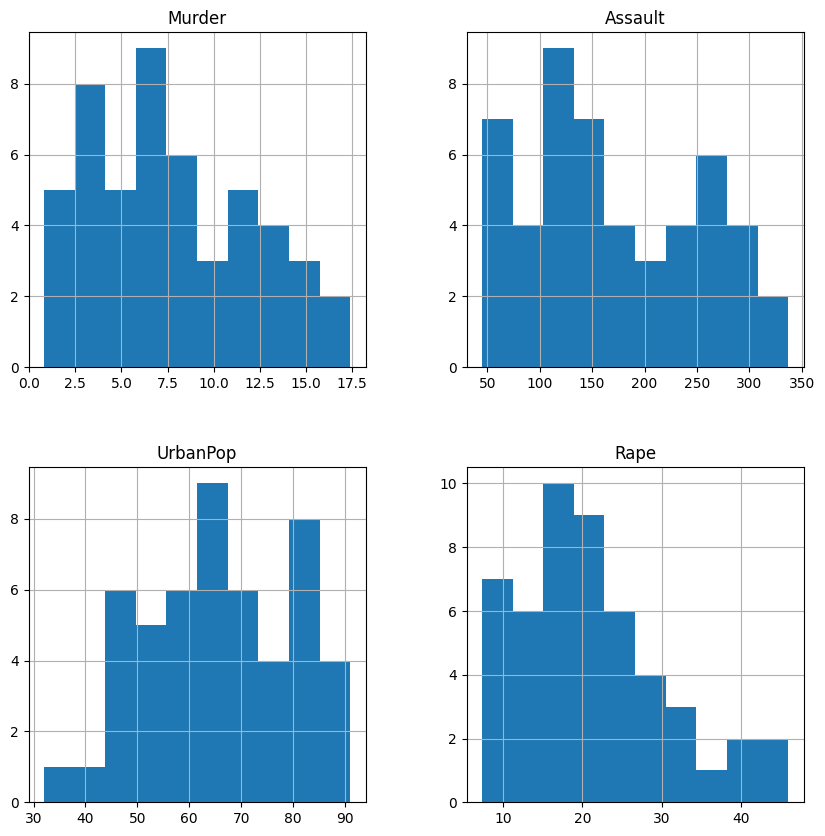

In [24]:
df.hist(figsize=(10,10));

In [25]:
kmeans = KMeans()

In [26]:
?kmeans

Type:        KMeans
String form: KMeans()
File:        ~/anaconda3/envs/statsenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

    For an example of how to choose an optimal value for `n_clusters` refer to
    :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm implemented is "greedy k-means++". It             differs from the vanilla 

In [29]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

# K-Means Parametreleri
#### n_clusters: Küme sayısı olarak belirlenen k değeri. Veri setinin kaç farklı kümede gruplanacağını belirler.
#### init: Başlangıç merkezlerinin nasıl seçileceğini belirten bir parametre. Genellikle "k-means++" veya "random" olarak belirlenebilir. "k-means++" yöntemi, daha iyi başlangıç merkezlerinin seçilmesini sağlar ve genellikle daha iyi sonuçlar verir.
#### n_init: K-means algoritmasının farklı başlangıç noktalarıyla çalıştırılacağı iterasyon sayısıdır. En iyi sonucu elde etmek için algoritmanın kaç kez tekrar edileceğini belirtir.
#### max_iter: Bir iterasyonda küme merkezlerinin yeniden hesaplanması ve örneklerin kümelerle ilişkilendirilmesi için izin verilen maksimum iterasyon sayısıdır. Bu, algoritmanın kaç kez tekrar edileceğini ve ne zaman durdurulacağını belirler.
#### tol: Küme merkezlerinin konumunun ne kadar değişmesi gerektiğini belirleyen bir tolerans değeridir. Bu değer, algoritmanın durmasını sağlayan bir kriterdir. Eğer iki ardışık iterasyon arasındaki merkez değişikliği bu tolerans değerinden küçükse, algoritma durur.

In [30]:
k_fit = kmeans.fit(df)

## Aşağıda küme sayımızı görebiliyoruz.

In [31]:
k_fit.n_clusters

4

## Aşağıda satır bazında sırasıyla 1. 2. 3. ve 4. kümemizin merkezlerini görebiliyoruz. 4 kümenin uzaklık değerleri sırasıyla görülmektedir.

In [32]:
k_fit.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  4.27      ,  87.55      ,  59.75      ,  14.39      ],
       [ 11.82222222, 250.55555556,  68.        ,  28.        ],
       [ 11.8       , 300.85714286,  68.71428571,  28.85714286]])

## Aşağıda hangi gözlemin  hangi sınıfa ait olduğu görülmektedir.

In [33]:
k_fit.labels_

array([2, 2, 3, 0, 3, 0, 1, 2, 3, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 3, 2, 3, 1, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0], dtype=int32)

## Şimdi kümelerimizi Görselleştirelim 2 küme arasında bir görselleştirme yapalım

In [35]:
kmeans_for_cluster_visualizing = KMeans(n_clusters=2)
k_fit_for_vis = kmeans_for_cluster_visualizing.fit(df)

In [36]:
clusters = k_fit_for_vis.labels_

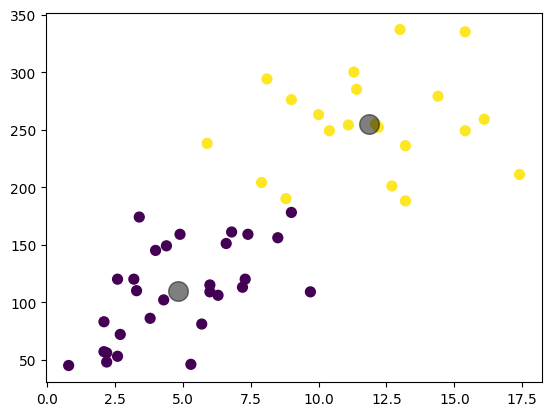

In [37]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")

merkezler = k_fit_for_vis.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

### Yukarıdaki görselin neye karşılık geldiğini aşağıdaki değerler ile göreibliriz.

In [38]:
df.iloc[:,1]

Alabama           236
Alaska            263
Arizona           294
Arkansas          190
California        276
Colorado          204
Connecticut       110
Delaware          238
Florida           335
Georgia           211
Hawaii             46
Idaho             120
Illinois          249
Indiana           113
Iowa               56
Kansas            115
Kentucky          109
Louisiana         249
Maine              83
Maryland          300
Massachusetts     149
Michigan          255
Minnesota          72
Mississippi       259
Missouri          178
Montana           109
Nebraska          102
Nevada            252
New Hampshire      57
New Jersey        159
New Mexico        285
New York          254
North Carolina    337
North Dakota       45
Ohio              120
Oklahoma          151
Oregon            159
Pennsylvania      106
Rhode Island      174
South Carolina    279
South Dakota       86
Tennessee         188
Texas             201
Utah              120
Vermont            48
Virginia  

## Şimdi 3D kümelenme yapısını görselleştirelim

In [43]:
!pip install --upgrade matplotlib
import mpl_toolkits

In [44]:
from mpl_toolkits.mplot3d import Axes3D

In [45]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

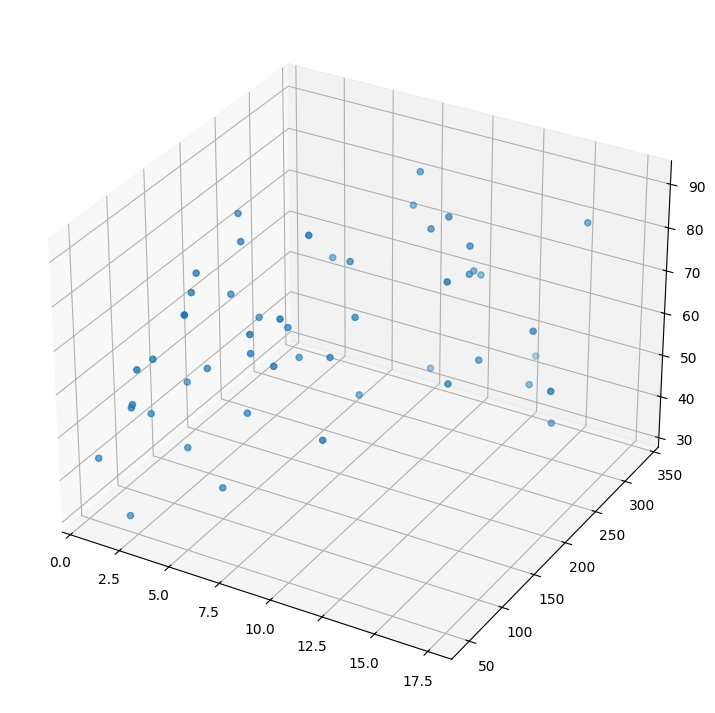

In [49]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

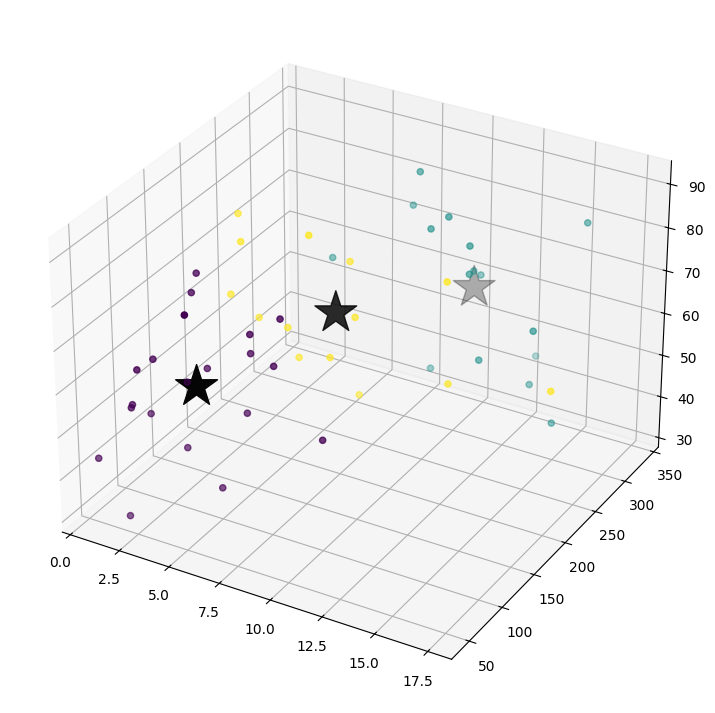

In [50]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

## Hangi eyaletin hangi kümede bulunduğuna ulaşmak için

In [51]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

In [52]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,1
6,Connecticut,2
7,Delaware,1
8,Florida,1
9,Georgia,1


In [53]:
df["kume_no"] = kumeler

In [54]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [55]:
df["kume_no"] = df["kume_no"] + 1

In [56]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2


# Optimum Küme Sayısının Belirlenmesi

### Genel amacımız kümeler arası benzerliğinin minimum küme içi benzerliğin maksimum olmasını sağlamaktır.

In [59]:
!pip install yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 561.3 kB/s eta 0:00:00a 0:00:01


## Aşağıda yazılan visualizer = KElbowVisualizer(kmeans, k=(2,50)) satırı n_cluster sayısını 2 den 50 'ye kadar dener ve en sağlıklı kümeleme sayısını bize görselleştirip verir

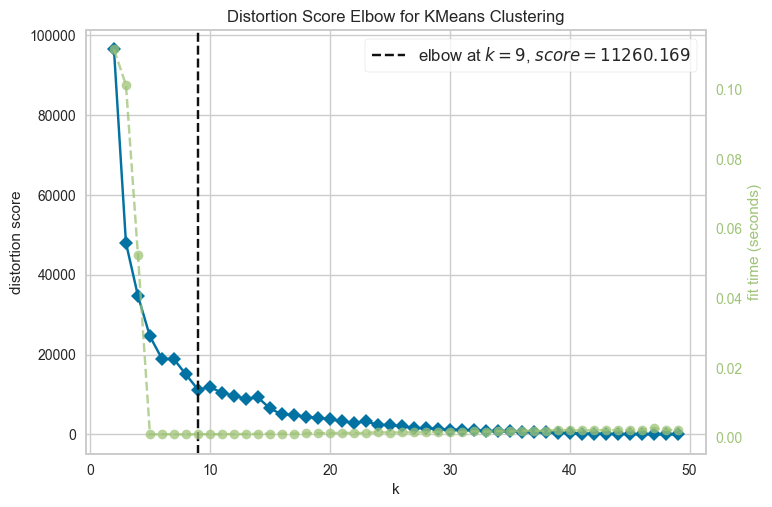

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof()  

#### K-Means kümeleme algoritmasında "distortion score" olarak adlandırılan bir değer, kümeleme performansını ölçmek için kullanılan bir metriktir. Bu değer, her bir veri noktasının kümesinin merkezine olan uzaklığının karelerinin toplamını temsil eder.

#### Distorsiyon skoru, her bir kümenin homojenliğini ve veri noktalarının kümeler içinde ne kadar iyi gruplandığını değerlendirmek için kullanılır. Düşük bir distorsiyon skoru, kümeleme sonuçlarının daha iyileştirilmiş olduğunu ve veri noktalarının kümeler içinde daha sıkı bir şekilde gruplandığını gösterir.

#### K-Means algoritması, küme merkezlerinin konumunu optimize etmeye çalışırken bu distorsiyon skorunu minimize etmeye çalışır. Bu nedenle, kümeleme işlemi sırasında distorsiyon skoru düşerken, kümeleme performansı genellikle artar. Bu skor, küme sayısını belirleme veya farklı kümeleme algoritmalarını karşılaştırma gibi işlemlerde kullanılabilir.

In [65]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [67]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,0
4,California,0
5,Colorado,0
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,0


##  Hiyerarşik Kümeleme Yöntemi

#### Hiyerarşik kümeleme (hierarchical clustering), veri setindeki örnekleri bir hiyerarşi veya ağaç benzeri bir yapıda kümelere bölen bir kümeleme yöntemidir. Bu yöntem, küme merkezlerini önceden belirlemek yerine, örnekler arasındaki benzerlik veya uzaklık ölçüsüne dayanarak kümeleme işlemini gerçekleştirir. Hiyerarşik kümeleme, agglomeratif (birleştirici) ve bölücü (bölünmüş) olmak üzere iki ana türde olabilir.

#### Agglomeratif hiyerarşik kümeleme, başlangıçta her bir örneğin bir küme olduğu ve ardından benzer örnekler bir araya gelene kadar kümeleme işlemini gerçekleştirir. Bölücü hiyerarşik kümeleme ise, başlangıçta tüm örneklerin bir küme olduğu ve ardından benzerlik ölçütlerine göre kümelerin parçalara ayrılmasını içerir.

#### Hem agglomeratif hem de bölücü hiyerarşik kümeleme algoritmaları, genellikle aşağıdaki adımları takip eder:

#### Başlangıç Kümeleme: Her bir örnek başlangıçta bir küme olarak kabul edilir. Agglomeratif yaklaşımda, her bir örnek kendi kümesine sahipken, bölücü yaklaşımda tüm örnekler tek bir küme içindedir.
#### Benzerlik veya Uzaklık Ölçümü: Her bir örnek veya küme arasındaki benzerlik veya uzaklık ölçülür. Bu, Öklid mesafesi, Manhattan mesafesi, korelasyon katsayısı veya başka bir benzerlik metriği kullanılarak yapılabilir.
#### Kümelerin Birleştirilmesi veya Bölünmesi: Agglomeratif yaklaşımda, en yakın iki küme birleştirilir ve bu birleştirme işlemi tekrarlanır. Bölücü yaklaşımda ise, belirli bir kriteri karşılayan küme parçalara ayrılır.
#### Dendrogram Oluşturma: Agglomeratif hiyerarşik kümeleme durumunda, birleştirme işlemleri sırasında oluşan her adımda bir dendrogram oluşturulur. Dendrogram, kümeleme işleminin görsel bir temsili olarak kullanılır ve kümeleme sonuçlarını anlamak için kullanılabilir.
#### Küme Sayısının Belirlenmesi: Hiyerarşik kümeleme sonuçlarını yorumlamak için, dendrogramdaki kesim noktalarına bakılarak optimal küme sayısı belirlenebilir. Bu, veri setinin yapısına ve analiz amaçlarına bağlı olarak değişebilir.

In [2]:
df = pd.read_csv('./USArrests.csv')
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df = df.rename_axis(None)
df.head()


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [4]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

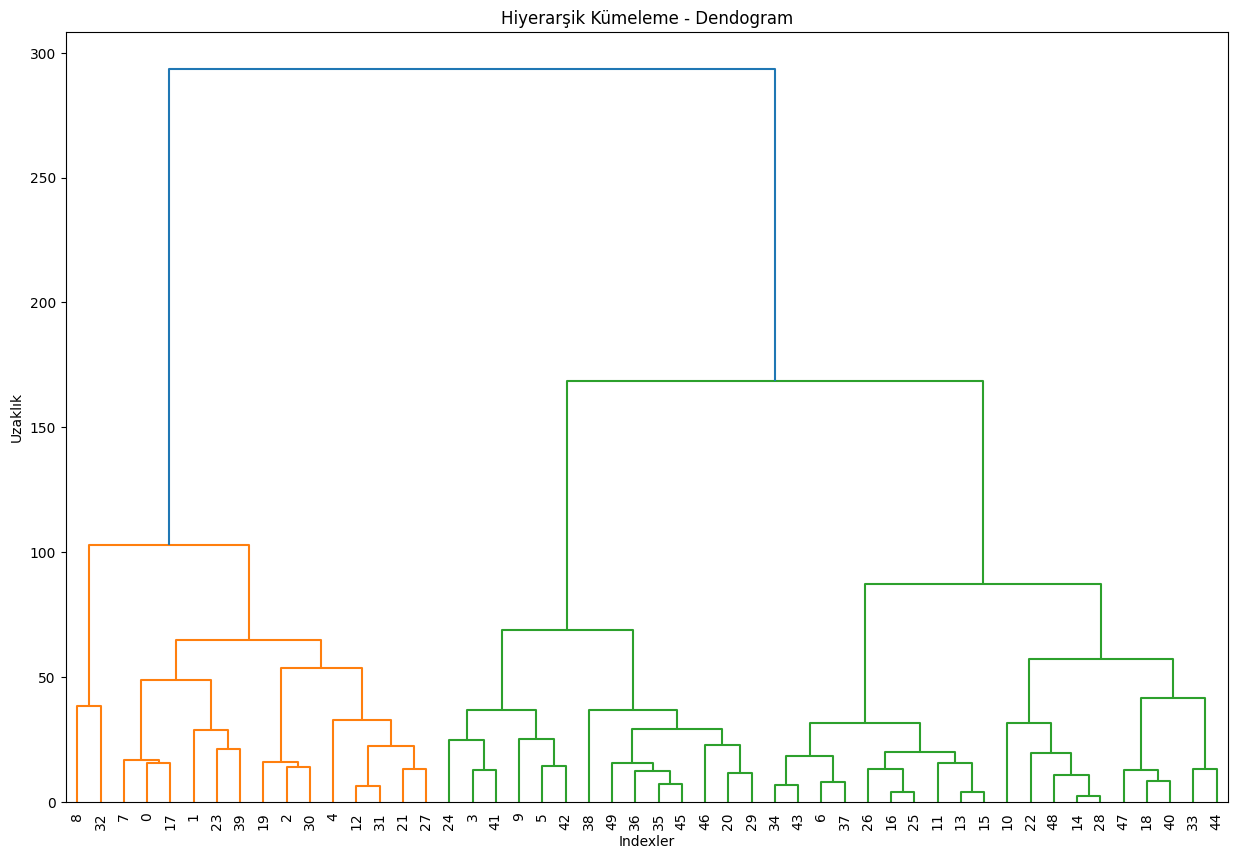

In [5]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

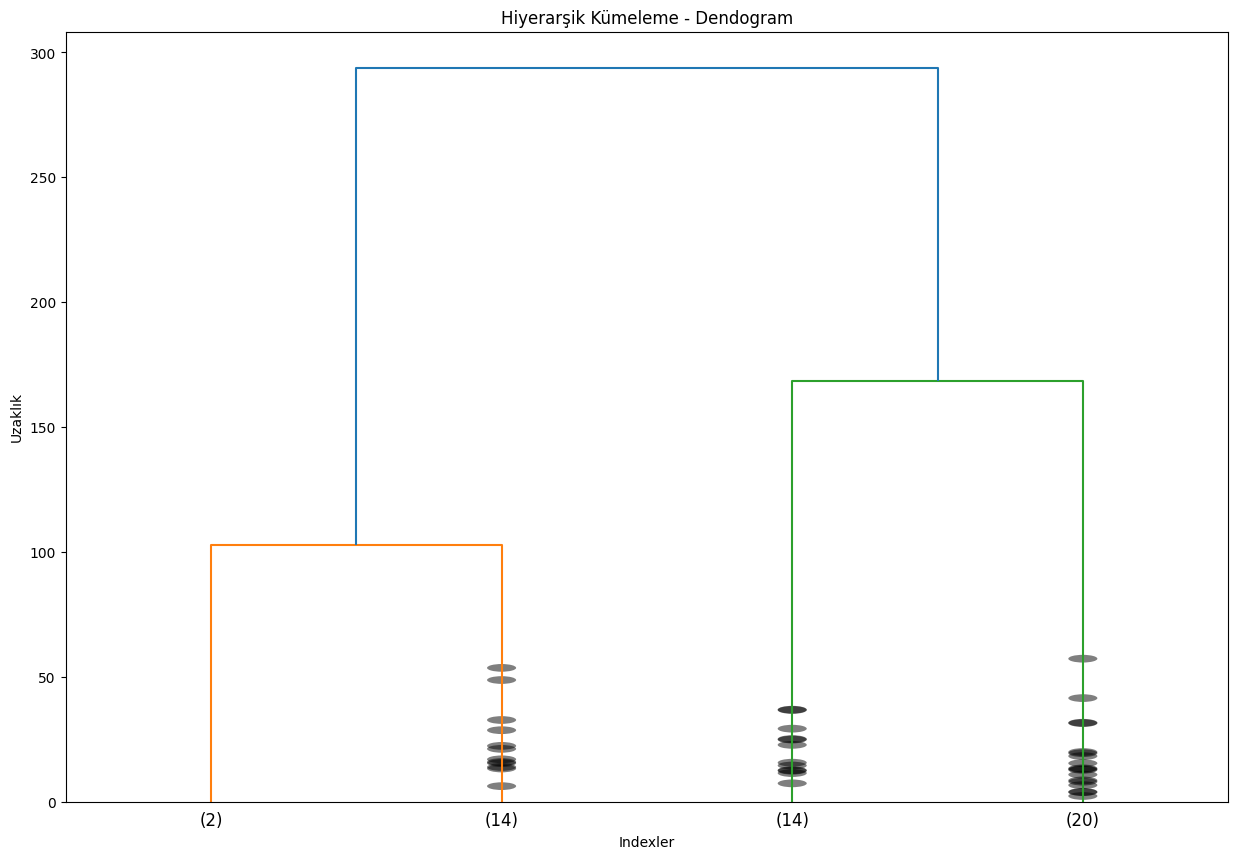

In [6]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

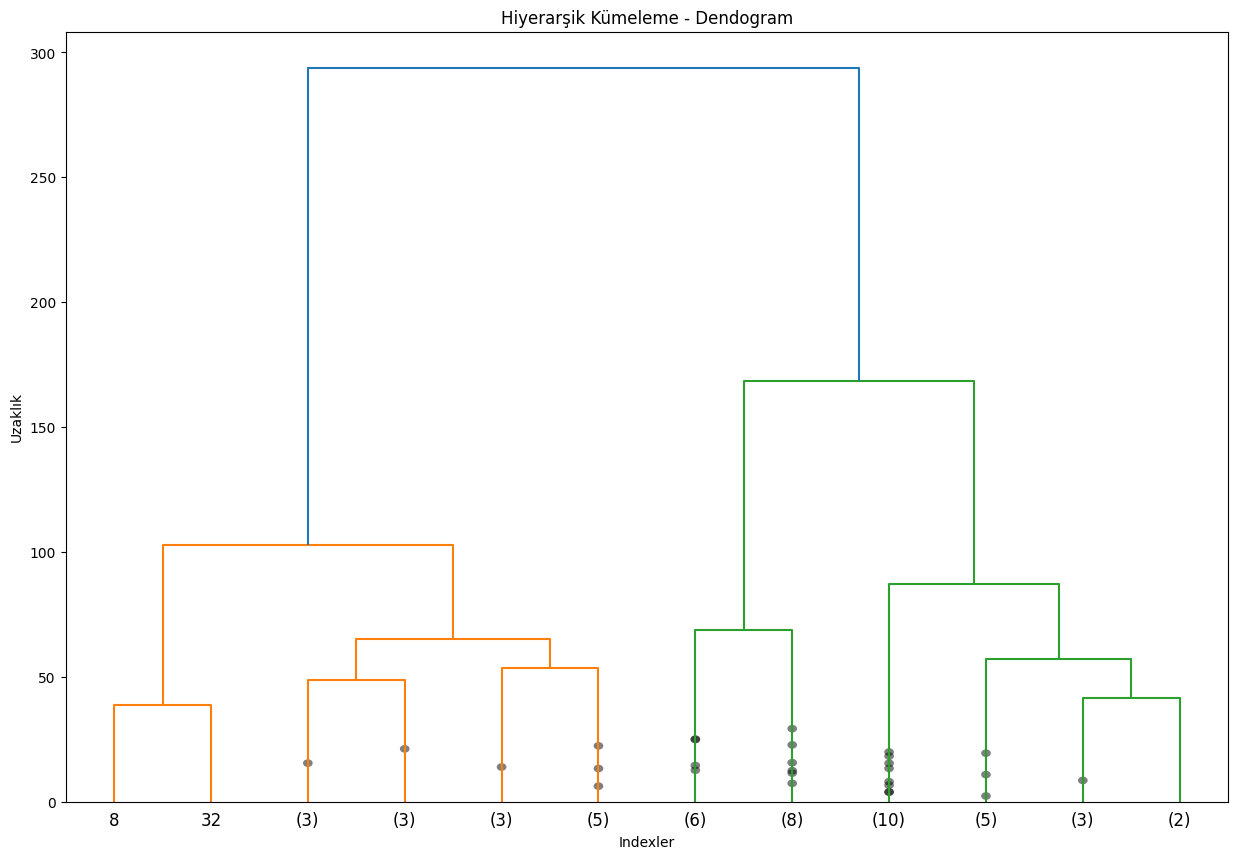

In [7]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 12,
    show_contracted = True
);

#### "Truncate mode" terimi, genellikle veri analizi veya veri görselleştirme süreçlerinde kullanılan bir terimdir. Bu terim, bir grafik veya tablo oluşturulurken, veri setindeki belirli bir kısmın görüntülenmesi veya işlenmesi için kullanılır.

#### Özellikle büyük veri setleriyle çalışırken, tüm veriyi işlemek veya görselleştirmek pratik olmayabilir veya anlamsız olabilir. Bu durumda, veri setini bir şekilde kırpma veya sınırlandırma gerekebilir. İşte bu noktada "truncate mode" devreye girer.

#### Truncate mode, genellikle veri setinin belirli bir bölümünün seçilerek geri kalan kısmının atılması veya gösterilmemesi anlamına gelir. Örneğin, bir grafik oluştururken, yalnızca belirli bir aralıktaki verileri göstermek için truncate mode kullanılabilir. Bu, grafiklerin daha net ve anlaşılır olmasını sağlar.

#### Truncate mode, veri analizi ve görselleştirme araçlarının çoğunda bulunabilir ve veri setinin boyutunu yönetmek için kullanılabilir. Bu mod, analizinize veya görselleştirmenize odaklanmak için gereksiz veya aşırı veriyi filtrelemek için kullanışlı bir yöntemdir.

# Optimum Küme Sayısı

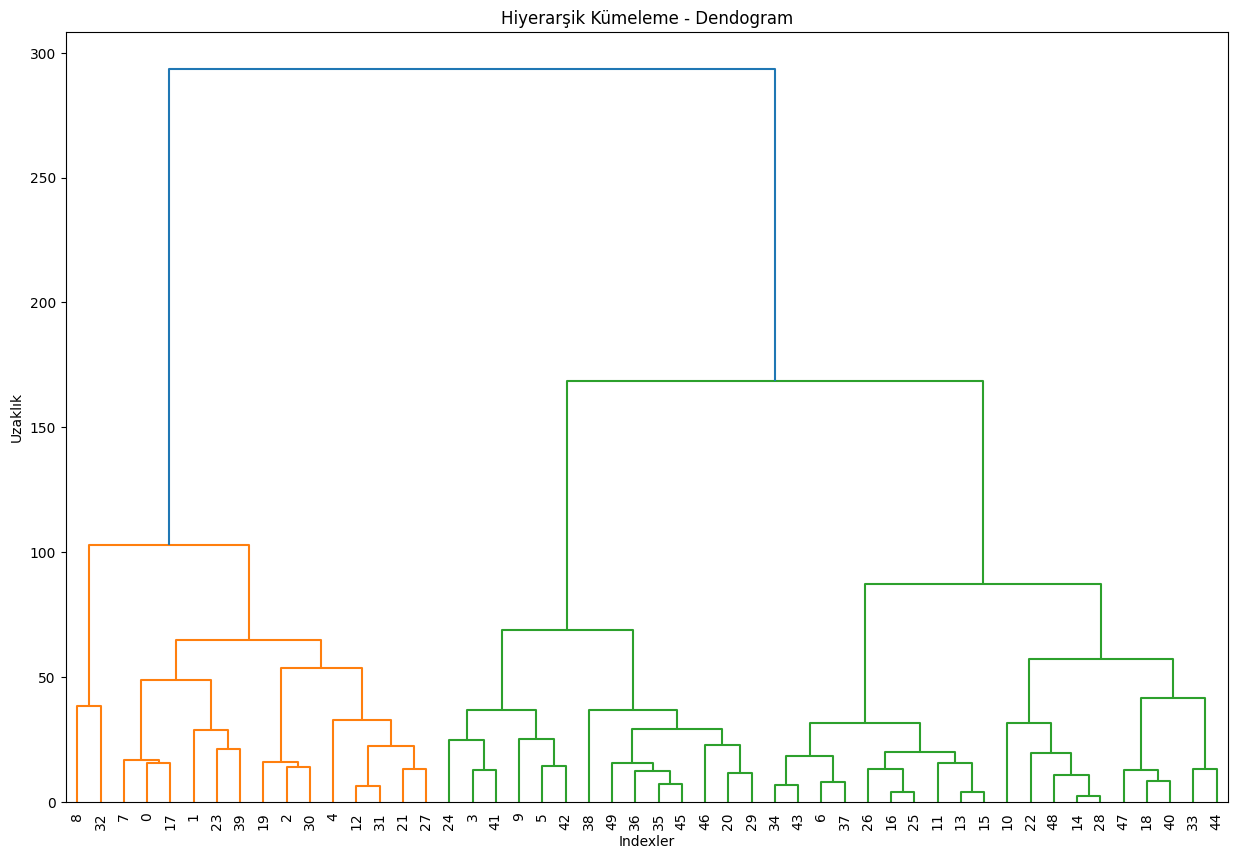

In [8]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [9]:
?den

Type:        dict
String form: {'icoord': [[5.0, 5.0, 15.0, 15.0], [35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [65.0, 65 <...>  'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2']}
Length:      6
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)

In [10]:
?dendrogram

Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='C0',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children. The top of the U-link indicates a
cluster merge. The two legs of the U-link indicate which clusters
were merged. The length of the two legs of the U-link represents
the distance between the child clusters. It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix encodi

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [15]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [16]:
df["kume_no"] = cluster.fit_predict(df)

In [17]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


# PCA Analizi

#### Temel bileşen analizi (PCA), çok boyutlu veri setlerini daha düşük boyutlu bir uzayda temsil etmek için kullanılan bir boyut azaltma tekniğidir. PCA, veri setindeki değişkenliği koruyarak, veri setindeki karmaşıklığı azaltır ve veri analizi ve görselleştirme işlemlerini daha etkili hale getirir.

#### PCA'nın temel amacı, veri setindeki değişkenliği temsil eden yeni bir koordinat sistemi oluşturmaktır. Bu yeni koordinat sisteminde, veri seti boyutlarını ifade eden "bileşenler" bulunur. PCA, bu bileşenleri bulmak için veri setindeki kovaryans matrisini ve özdeğer ayrışımını kullanır.

#### PCA'nın çalışma adımları genellikle şu şekildedir:

#### Veri Standartizasyonu: PCA'ya başlamadan önce, veri setindeki değişkenlerin standartlaştırılması genellikle önerilir. Bu, her bir değişkenin ortalamasını sıfıra ve standart sapmasını bir birime dönüştürerek gerçekleştirilir. Bu adım, veri setindeki farklı ölçeklendirme düzeylerini dengelemeye yardımcı olur.
#### Kovaryans Matrisinin Hesaplanması: PCA, veri setindeki değişkenler arasındaki ilişkiyi temsil eden kovaryans matrisini hesaplar. Kovaryans, iki değişken arasındaki ilişkinin ne kadar güçlü olduğunu ölçer.
#### Özdeğer ve Özvektör Analizi: Kovaryans matrisinin özdeğer ve özvektörlerini hesaplar. Özdeğerler, değişkenlerin veri setindeki değişkenliği açıklama yeteneklerini temsil ederken, özvektörler, bu değişkenliklerin yönlerini temsil eder.
#### Bileşenlerin Seçimi: Özdeğerlerin büyüklüğüne göre sıralanır ve en büyük özdeğerlere karşılık gelen özvektörler seçilir. Bu özvektörler, veri setindeki değişkenliği en iyi temsil eden "temel bileşenler" olarak adlandırılır.
#### Yeni Veri Setinin Oluşturulması: Seçilen temel bileşenler kullanılarak, veri seti daha düşük boyutlu bir uzaya dönüştürülür. Bu yeni veri seti, orijinal veri setindeki değişkenliği mümkün olduğunca koruyacak şekilde oluşturulur.
#### PCA, boyut azaltma, veri görselleştirme, gürültü azaltma ve özellik seçimi gibi birçok farklı uygulamada kullanılır. Özellikle çok boyutlu veri setlerindeki yapının daha iyi anlaşılmasına ve model performansının iyileştirilmesine yardımcı olur.